# Etude de marché: La poule qui chante 🐔

## Table des matières
* [Données](#donnees)
    * [Initialisation des données](#initialisation_des_données)
        * [Alimentaire](#alimentaire)
        * [Population](#population)
        * [Revenue annuel brut](#rnb)
* [Création d'un nouveau dataframe pour chaque pays](#dataframe)
    * [Merges des dataframes](#merge)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Données <a class="anchor" id="donnees"></a>

Nous disposons de deux jeux de données pour ce projet 

**Alimentaire** contient tout le necessaire sur les disponibilité des pays
    
**Population** contient la population des pays

## Initialisation des données <a class="anchor" id="initialisation_des_données"></a>

In [2]:
alimentaire=pd.read_csv('DisponibiliteAlimentaire_2017.csv')
pop=pd.read_csv('Population_2000_2018.csv')
#Recupérer sur le site de la FAO
rnb_2017=pd.read_csv('rnb.csv')

### Alimentaire <a class="anchor" id="alimentaire"></a>

In [3]:
alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [4]:
alimentaire.describe(include='all')

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
count,176600,176600,176600.000000,176600,176600.000000,176600,176600.000000,176600,176600.0,176600.0,176600,176600.000000,176600,176600
unique,1,1,NaN,174,NaN,17,NaN,98,NaN,NaN,4,NaN,2,2
top,FBS,Nouveaux Bilans Alimentaire,NaN,Tchad,NaN,Disponibilité intérieure,NaN,Maïs et produits,NaN,NaN,Milliers de tonnes,NaN,S,Données standardisées
freq,176600,176600,NaN,1416,NaN,15905,NaN,2593,NaN,NaN,118487,NaN,118487,118487
mean,NaN,NaN,125.474740,NaN,3810.052894,NaN,2628.778545,NaN,2017.0,2017.0,NaN,210.554918,NaN,NaN
std,NaN,NaN,72.941699,NaN,2211.790089,NaN,91.993247,NaN,0.0,0.0,NaN,4762.047787,NaN,NaN
min,NaN,NaN,1.000000,NaN,645.000000,NaN,2511.000000,NaN,2017.0,2017.0,NaN,-10388.000000,NaN,NaN
25%,NaN,NaN,63.000000,NaN,684.000000,NaN,2556.000000,NaN,2017.0,2017.0,NaN,0.000000,NaN,NaN
50%,NaN,NaN,120.000000,NaN,5142.000000,NaN,2612.000000,NaN,2017.0,2017.0,NaN,0.120000,NaN,NaN
75%,NaN,NaN,188.000000,NaN,5301.000000,NaN,2732.000000,NaN,2017.0,2017.0,NaN,8.462500,NaN,NaN


In [5]:
alimentaire.nunique()

Code Domaine                 1
Domaine                      1
Code zone                  174
Zone                       174
Code Élément                17
Élément                     17
Code Produit                98
Produit                     98
Code année                   1
Année                        1
Unité                        4
Valeur                    7250
Symbole                      2
Description du Symbole       2
dtype: int64

In [6]:
def doublons(df):
    print(len(df) - len(df.drop_duplicates()), 'doublons parfait')

doublons(alimentaire)

0 doublons parfait


In [7]:
alimentaire.head(10)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées
5,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5521,Aliments pour animaux,2511,Blé et produits,2017,2017,Milliers de tonnes,76.0,S,Données standardisées
6,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5527,Semences,2511,Blé et produits,2017,2017,Milliers de tonnes,344.0,S,Données standardisées
7,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5123,Pertes,2511,Blé et produits,2017,2017,Milliers de tonnes,642.0,S,Données standardisées
8,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5170,Résidus,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
9,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5142,Nourriture,2511,Blé et produits,2017,2017,Milliers de tonnes,5640.0,S,Données standardisées


### Population <a class="anchor" id="population"></a>

In [10]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [11]:
pop.describe(include='all')

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
count,4411,4411,4411.000000,4411,4411.0,4411,4411.0,4411,4411.000000,4411.000000,4411,4.411000e+03,4411,4411,258
unique,1,1,NaN,238,NaN,1,NaN,1,NaN,NaN,1,NaN,2,2,1
top,OA,Séries temporelles annuelles,NaN,Afghanistan,NaN,Population totale,NaN,Population-Estimations,NaN,NaN,1000 personnes,NaN,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
freq,4411,4411,NaN,19,NaN,4411,NaN,4411,NaN,NaN,4411,NaN,4374,4374,258
mean,NaN,NaN,132.202902,NaN,511.0,NaN,3010.0,NaN,2009.068238,2009.068238,NaN,2.963004e+04,NaN,NaN,NaN
std,NaN,NaN,75.854840,NaN,0.0,NaN,0.0,NaN,5.481539,5.481539,NaN,1.238029e+05,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,511.0,NaN,3010.0,NaN,2000.000000,2000.000000,NaN,7.850000e-01,NaN,NaN,NaN
25%,NaN,NaN,68.000000,NaN,511.0,NaN,3010.0,NaN,2004.000000,2004.000000,NaN,3.921890e+02,NaN,NaN,NaN
50%,NaN,NaN,132.000000,NaN,511.0,NaN,3010.0,NaN,2009.000000,2009.000000,NaN,4.764741e+03,NaN,NaN,NaN
75%,NaN,NaN,195.000000,NaN,511.0,NaN,3010.0,NaN,2014.000000,2014.000000,NaN,1.821548e+04,NaN,NaN,NaN


In [12]:
def doublons(df):
    print(len(df) - len(df.drop_duplicates()), 'doublons parfait')

doublons(pop)

0 doublons parfait


In [13]:
pop.head(10)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN
5,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2005,2005,1000 personnes,25654.277,X,Sources internationales sûres,NaN
6,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2006,2006,1000 personnes,26433.049,X,Sources internationales sûres,NaN
7,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2007,2007,1000 personnes,27100.536,X,Sources internationales sûres,NaN
8,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2008,2008,1000 personnes,27722.276,X,Sources internationales sûres,NaN
9,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2009,2009,1000 personnes,28394.813,X,Sources internationales sûres,NaN


In [14]:
pop.nunique()

Code Domaine                 1
Domaine                      1
Code zone                  238
Zone                       238
Code Élément                 1
Élément                      1
Code Produit                 1
Produit                      1
Code année                  19
Année                       19
Unité                        1
Valeur                    4398
Symbole                      2
Description du Symbole       2
Note                         1
dtype: int64

multiplions la pop par 1000 puisque celle-ci est par mille habitants pour retomber sur les valeurs standards

In [15]:
pop['population']=pop['Valeur']*1000

Nous allons garder seulement l'année 2017 pour "matcher" avec notre data alimentaire

In [16]:
pop_2017=pop.loc[pop['Année']==2017]

In [17]:
pop_2017=pd.pivot_table(pop_2017, index ='Zone', values= "population", aggfunc= sum)
pop_2017.reset_index()

,Zone,population
0,Afghanistan,36296113.0
1,Afrique du Sud,57009756.0
2,Albanie,2884169.0
3,Algérie,41389189.0
4,Allemagne,82658409.0
...,...,...
231,Îles Salomon,636039.0
232,Îles Turques-et-Caïques,37115.0
233,Îles Vierges américaines,104751.0
234,Îles Vierges britanniques,29577.0


### Revenue annuel brut <a class="anchor" id="rnb"></a>

Changement de noms du pays-bas pour convenir au nom du pays-bas du df principal

In [19]:
rnb_2017['Zone']= rnb_2017['Zone'].replace(['Pays-Bas (Royaume des)'],['Pays-Bas'])

In [20]:
rnb_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            211 non-null    object 
 1   Domaine                 211 non-null    object 
 2   Code zone (M49)         211 non-null    int64  
 3   Zone                    211 non-null    object 
 4   Code Élément            211 non-null    int64  
 5   Élément                 211 non-null    object 
 6   Code Produit            211 non-null    int64  
 7   Produit                 211 non-null    object 
 8   Code année              211 non-null    int64  
 9   Année                   211 non-null    int64  
 10  Unité                   211 non-null    object 
 11  Valeur                  211 non-null    float64
 12  Symbole                 211 non-null    object 
 13  Description du Symbole  211 non-null    object 
 14  Note                    0 non-null      fl

In [21]:
rnb_2017.describe(include='all')

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
count,211,211,211.000000,211,211.0,211,211.0,211,211.0,211.0,211,211.000000,211,211,0.0
unique,1,1,NaN,211,NaN,1,NaN,1,NaN,NaN,1,NaN,1,1,NaN
top,MK,Indicateurs macro,NaN,Afghanistan,NaN,Valeur US $ par habitant,NaN,Revenu national brut,NaN,NaN,US$,NaN,X,Ciffre de sources internationales,NaN
freq,211,211,NaN,1,NaN,211,NaN,211,NaN,NaN,211,NaN,211,211,NaN
mean,NaN,NaN,429.407583,NaN,6119.0,NaN,22011.0,NaN,2017.0,2017.0,NaN,16376.606337,NaN,NaN,NaN
std,NaN,NaN,251.237972,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,24806.373851,NaN,NaN,NaN
min,NaN,NaN,4.000000,NaN,6119.0,NaN,22011.0,NaN,2017.0,2017.0,NaN,295.780939,NaN,NaN,NaN
25%,NaN,NaN,210.000000,NaN,6119.0,NaN,22011.0,NaN,2017.0,2017.0,NaN,2015.642986,NaN,NaN,NaN
50%,NaN,NaN,430.000000,NaN,6119.0,NaN,22011.0,NaN,2017.0,2017.0,NaN,6339.886355,NaN,NaN,NaN
75%,NaN,NaN,642.500000,NaN,6119.0,NaN,22011.0,NaN,2017.0,2017.0,NaN,19664.238099,NaN,NaN,NaN


In [22]:
def doublons(df):
    print(len(df) - len(df.drop_duplicates()), 'doublons parfait')

doublons(rnb_2017)

0 doublons parfait


In [23]:
rnb_2017.nunique()

Code Domaine                1
Domaine                     1
Code zone (M49)           211
Zone                      211
Code Élément                1
Élément                     1
Code Produit                1
Produit                     1
Code année                  1
Année                       1
Unité                       1
Valeur                    211
Symbole                     1
Description du Symbole      1
Note                        0
dtype: int64

In [24]:
rnb_2017.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22011,Revenu national brut,2017,2017,US$,537.126294,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,710,Afrique du Sud,6119,Valeur US $ par habitant,22011,Revenu national brut,2017,2017,US$,6537.504869,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,8,Albanie,6119,Valeur US $ par habitant,22011,Revenu national brut,2017,2017,US$,4532.791976,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,12,Algérie,6119,Valeur US $ par habitant,22011,Revenu national brut,2017,2017,US$,4081.775086,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,276,Allemagne,6119,Valeur US $ par habitant,22011,Revenu national brut,2017,2017,US$,45734.557505,X,Ciffre de sources internationales,NaN


In [25]:
rnb_2017=rnb_2017[['Zone','Valeur']]
rnb_2017 = rnb_2017.rename(columns = {'Valeur': 'rnb_hab'})

In [26]:
rnb_2017

,Zone,rnb_hab
0,Afghanistan,537.126294
1,Afrique du Sud,6537.504869
2,Albanie,4532.791976
3,Algérie,4081.775086
4,Allemagne,45734.557505
...,...,...
206,Venezuela (République bolivarienne du),7704.542477
207,Viet Nam,2199.039303
208,Yémen,608.982554
209,Zambie,1448.488895


# Création d'un nouveau dataframe pour chaque pays <a class="anchor" id="dataframe"></a>

Nous n'allons garder que le necessaire des données

In [27]:
list_dispo =['Disponibilité intérieure','Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité alimentaire en quantité (kg/personne/an)'
             ,'Disponibilité de protéines en quantité (g/personne/jour)', 'Importations - Quantité',
             'Exportations - Quantité','Production']
dispo_2017= pd.pivot_table(alimentaire[alimentaire['Élément'].isin(list_dispo)],
                                                      index ='Zone', values= "Valeur", aggfunc= 'sum', columns=['Élément'])
dispo_2017.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174 entries, Afghanistan to Îles Salomon
Data columns (total 7 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Disponibilité alimentaire (Kcal/personne/jour)            172 non-null    float64
 1   Disponibilité alimentaire en quantité (kg/personne/an)    172 non-null    float64
 2   Disponibilité de protéines en quantité (g/personne/jour)  172 non-null    float64
 3   Disponibilité intérieure                                  174 non-null    float64
 4   Exportations - Quantité                                   174 non-null    float64
 5   Importations - Quantité                                   174 non-null    float64
 6   Production                                                174 non-null    float64
dtypes: float64(7)
memory usage: 10.9+ KB


Il y a deux pays qui n'ont pas de valeurs pour les 3 premieres disponibilité

In [28]:
dispo_2017.loc[dispo_2017['Disponibilité alimentaire (Kcal/personne/jour)'].isnull()== True]

Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
Zone,,,,,,,
Bermudes,NaN,NaN,NaN,4.0,0.0,3.0,0.0
Brunéi Darussalam,NaN,NaN,NaN,28.0,2.0,16.0,13.0


Les bermudes et le brunéi darussalam n'ont pas de valeurs je décide pour l'instant de ne pas y toucher, nous pouvons les mettre de côté plus tard si nécessaire

In [29]:
dispo_2017.describe(include='all')

Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
count,172.000000,172.000000,172.000000,1.740000e+02,174.000000,174.000000,1.740000e+02
mean,2858.395349,692.573081,81.192907,6.349196e+04,9135.994253,8500.879310,6.475456e+04
std,454.544301,200.704764,20.199063,2.237781e+05,23804.832707,19815.935449,2.236311e+05
min,1754.000000,302.470000,39.910000,4.000000e+00,0.000000,1.000000,0.000000e+00
25%,2514.250000,537.755000,64.212500,2.703750e+03,160.250000,675.000000,1.979500e+03
50%,2871.500000,677.455000,81.390000,1.185200e+04,840.000000,2587.000000,1.066450e+04
75%,3250.250000,882.612500,96.445000,3.258300e+04,7056.000000,7517.250000,3.176325e+04
max,3770.000000,1260.490000,141.340000,2.303613e+06,207278.000000,205903.000000,2.147703e+06


In [30]:
dispo_2017

Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
Zone,,,,,,,
Afghanistan,1997.0,357.31,54.09,15139.0,601.0,4555.0,11609.0
Afrique du Sud,2987.0,556.42,83.36,66840.0,10968.0,9020.0,68455.0
Albanie,3400.0,1260.49,119.50,4879.0,156.0,884.0,4231.0
Algérie,3345.0,798.71,92.85,45365.0,743.0,19718.0,26763.0
Allemagne,3559.0,943.24,104.07,174960.0,58793.0,66550.0,167828.0
...,...,...,...,...,...,...,...
Émirats arabes unis,3370.0,627.67,107.26,11795.0,4914.0,14986.0,1793.0
Équateur,2585.0,563.62,65.77,23810.0,8897.0,2134.0,30843.0
États-Unis d'Amérique,3762.0,990.38,113.61,849821.0,207278.0,84507.0,974034.0


Création d'une colonne pour avoir le ratio de nos proteine animal par la dispo alimentaire (kg/an) et cela en %

In [31]:
prot_animal=['Viande de Volailles','Viande de Bovins',
            "Viande d'Ovins/Caprins", 'Viande de Suides',
            'Viande de Volailles', 'Viande, Autre', 'Abats Comestible',
            'Beurre, Ghee', 'Crème', 'Graisses Animales Crue', 'Oeufs',
            'Lait - Excl Beurre', 'Poissons Eau Douce', 'Miscellanees','Perciform',
            'Poissons Pelagiques', 'Poissons Marins, Autres', 'Crustacés',
            'Cephalopodes', 'Mollusques, Autres', 'Animaux Aquatiques Autre','Viande de Anim Aquatiq']
list_prot_animal=alimentaire.loc[alimentaire['Produit'].isin(prot_animal)]

In [32]:
dispo_animal=pd.pivot_table(list_prot_animal[list_prot_animal['Élément'].isin(list_dispo)],
                index ='Zone', values= "Valeur", aggfunc= 'sum', columns=['Élément'])
dispo_animal

Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
Zone,,,,,,,
Afghanistan,190.0,67.84,10.57,2722.0,0.0,185.0,2538.0
Afrique du Sud,454.0,131.80,34.56,8166.0,1396.0,1317.0,8238.0
Albanie,1097.0,475.90,66.41,1420.0,10.0,118.0,1326.0
Algérie,405.0,156.12,25.77,6692.0,7.0,2213.0,4486.0
Allemagne,1092.0,393.36,63.08,37437.0,24619.0,17429.0,44689.0
...,...,...,...,...,...,...,...
Émirats arabes unis,610.0,144.03,44.23,1682.0,495.0,1717.0,478.0
Équateur,506.0,174.33,29.98,3224.0,1118.0,175.0,4104.0
États-Unis d'Amérique,1022.0,420.67,73.88,146295.0,25185.0,10788.0,161750.0


In [33]:
dispo_animal['ratio proteine animal']= round((dispo_animal['Disponibilité de protéines en quantité (g/personne/jour)']/1000*365)/dispo_2017['Disponibilité alimentaire en quantité (kg/personne/an)']*100,2)
dispo_animal

Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,ratio proteine animal
Zone,,,,,,,,
Afghanistan,190.0,67.84,10.57,2722.0,0.0,185.0,2538.0,1.08
Afrique du Sud,454.0,131.80,34.56,8166.0,1396.0,1317.0,8238.0,2.27
Albanie,1097.0,475.90,66.41,1420.0,10.0,118.0,1326.0,1.92
Algérie,405.0,156.12,25.77,6692.0,7.0,2213.0,4486.0,1.18
Allemagne,1092.0,393.36,63.08,37437.0,24619.0,17429.0,44689.0,2.44
...,...,...,...,...,...,...,...,...
Émirats arabes unis,610.0,144.03,44.23,1682.0,495.0,1717.0,478.0,2.57
Équateur,506.0,174.33,29.98,3224.0,1118.0,175.0,4104.0,1.94
États-Unis d'Amérique,1022.0,420.67,73.88,146295.0,25185.0,10788.0,161750.0,2.72


Nous avons maintenant notre dataframe par pays et dont le ratio prot animal/dispo est établie, il reste à effectuer la même chose pour la viande de volaille

In [34]:
list_volaille=alimentaire.loc[alimentaire['Produit']=='Viande de Volailles']
dispo_volaille=pd.pivot_table(list_volaille[list_volaille['Élément'].isin(list_dispo)],
                index ='Zone', values= "Valeur", aggfunc= 'sum', columns=['Élément'])
dispo_volaille

Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
Zone,,,,,,,
Afghanistan,5.0,1.53,0.54,57.0,NaN,29.0,28.0
Afrique du Sud,143.0,35.69,14.11,2118.0,63.0,514.0,1667.0
Albanie,85.0,16.36,6.26,47.0,0.0,38.0,13.0
Algérie,22.0,6.38,1.97,277.0,0.0,2.0,275.0
Allemagne,71.0,19.47,7.96,1739.0,646.0,842.0,1514.0
...,...,...,...,...,...,...,...
Émirats arabes unis,147.0,43.47,14.80,412.0,94.0,433.0,48.0
Équateur,83.0,19.31,6.15,341.0,0.0,0.0,340.0
États-Unis d'Amérique,219.0,55.68,19.93,18266.0,3692.0,123.0,21914.0


In [35]:
dispo_volaille.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, Afghanistan to Îles Salomon
Data columns (total 7 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Disponibilité alimentaire (Kcal/personne/jour)            172 non-null    float64
 1   Disponibilité alimentaire en quantité (kg/personne/an)    172 non-null    float64
 2   Disponibilité de protéines en quantité (g/personne/jour)  172 non-null    float64
 3   Disponibilité intérieure                                  170 non-null    float64
 4   Exportations - Quantité                                   135 non-null    float64
 5   Importations - Quantité                                   170 non-null    float64
 6   Production                                                168 non-null    float64
dtypes: float64(7)
memory usage: 10.8+ KB


Nous avons deux pays qui n'ont pas de valeurs 

In [36]:
dispo_volaille.loc[dispo_volaille['Disponibilité intérieure'].isnull()== True]

Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
Zone,,,,,,,
Ouzbékistan,6.0,1.96,0.63,NaN,NaN,NaN,NaN
République démocratique populaire lao,41.0,10.91,3.59,NaN,NaN,NaN,NaN


L'Ouzbékistan et le lao n'ont pas de valeur pour la dispo intérieur et l'importation. Nous les supprimerons ci necessaire

Création d'un ratio de proteine de volaille / disponibilité en protéine

In [37]:
dispo_volaille['Ratio protéine volaille/protéines animal']= round(dispo_volaille['Disponibilité de protéines en quantité (g/personne/jour)']/dispo_animal['Disponibilité de protéines en quantité (g/personne/jour)']*100,2)
dispo_volaille

Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Ratio protéine volaille/protéines animal
Zone,,,,,,,,
Afghanistan,5.0,1.53,0.54,57.0,NaN,29.0,28.0,5.11
Afrique du Sud,143.0,35.69,14.11,2118.0,63.0,514.0,1667.0,40.83
Albanie,85.0,16.36,6.26,47.0,0.0,38.0,13.0,9.43
Algérie,22.0,6.38,1.97,277.0,0.0,2.0,275.0,7.64
Allemagne,71.0,19.47,7.96,1739.0,646.0,842.0,1514.0,12.62
...,...,...,...,...,...,...,...,...
Émirats arabes unis,147.0,43.47,14.80,412.0,94.0,433.0,48.0,33.46
Équateur,83.0,19.31,6.15,341.0,0.0,0.0,340.0,20.51
États-Unis d'Amérique,219.0,55.68,19.93,18266.0,3692.0,123.0,21914.0,26.98


In [38]:
#Création variable du taux de dependance à l'importation :
#TDI éléver = forte dépendance a l'importation
dispo_volaille['TDI (%)']=round(dispo_volaille['Importations - Quantité']/dispo_volaille['Disponibilité intérieure']*100,2)
#Création variable du taux d'auto-suffisance
dispo_volaille['TAS (%)']=round(dispo_volaille['Production']/dispo_volaille['Disponibilité intérieure']*100,2)

## Merge des dataframes <a class="anchor" id="merge"></a>

### Data prot

In [39]:
dispo_2017.drop(['Disponibilité alimentaire en quantité (kg/personne/an)','Disponibilité intérieure','Exportations - Quantité','Importations - Quantité','Production'], axis=1, inplace=True)
dispo_2017

Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
Zone,,
Afghanistan,1997.0,54.09
Afrique du Sud,2987.0,83.36
Albanie,3400.0,119.50
Algérie,3345.0,92.85
Allemagne,3559.0,104.07
...,...,...
Émirats arabes unis,3370.0,107.26
Équateur,2585.0,65.77
États-Unis d'Amérique,3762.0,113.61


In [40]:
dispo_animal.drop(['Disponibilité de protéines en quantité (g/personne/jour)','Disponibilité intérieure','Exportations - Quantité','Importations - Quantité','Production','Disponibilité alimentaire en quantité (kg/personne/an)','Disponibilité alimentaire (Kcal/personne/jour)'], axis=1,  inplace=True)
dispo_animal

Élément,ratio proteine animal
Zone,
Afghanistan,1.08
Afrique du Sud,2.27
Albanie,1.92
Algérie,1.18
Allemagne,2.44
...,...
Émirats arabes unis,2.57
Équateur,1.94
États-Unis d'Amérique,2.72


In [41]:
df_prot=pd.merge(dispo_2017,dispo_animal, on='Zone',indicator=True, how="left")
df_prot._merge.value_counts()

both          174
left_only       0
right_only      0
Name: _merge, dtype: int64

In [42]:
df_prot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174 entries, Afghanistan to Îles Salomon
Data columns (total 4 columns):
 #   Column                                                    Non-Null Count  Dtype   
---  ------                                                    --------------  -----   
 0   Disponibilité alimentaire (Kcal/personne/jour)            172 non-null    float64 
 1   Disponibilité de protéines en quantité (g/personne/jour)  172 non-null    float64 
 2   ratio proteine animal                                     172 non-null    float64 
 3   _merge                                                    174 non-null    category
dtypes: category(1), float64(3)
memory usage: 5.7+ KB


In [43]:
df_prot.loc[df_prot['Disponibilité alimentaire (Kcal/personne/jour)'].isnull()==True]

Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),ratio proteine animal,_merge
Zone,,,,
Bermudes,NaN,NaN,NaN,both
Brunéi Darussalam,NaN,NaN,NaN,both


In [44]:
df_prot=df_prot.drop('Bermudes')
df_prot=df_prot.drop('Brunéi Darussalam')

In [45]:
df_prot

Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),ratio proteine animal,_merge
Zone,,,,
Afghanistan,1997.0,54.09,1.08,both
Afrique du Sud,2987.0,83.36,2.27,both
Albanie,3400.0,119.50,1.92,both
Algérie,3345.0,92.85,1.18,both
Allemagne,3559.0,104.07,2.44,both
...,...,...,...,...
Émirats arabes unis,3370.0,107.26,2.57,both
Équateur,2585.0,65.77,1.94,both
États-Unis d'Amérique,3762.0,113.61,2.72,both


### data protXvolaille

In [46]:
dff= pd.merge(df_prot, dispo_volaille,indicator='oui', on ='Zone')
dff['oui'].value_counts()

both          172
left_only       0
right_only      0
Name: oui, dtype: int64

In [47]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, Afghanistan to Îles Salomon
Data columns (total 15 columns):
 #   Column                                                      Non-Null Count  Dtype   
---  ------                                                      --------------  -----   
 0   Disponibilité alimentaire (Kcal/personne/jour)_x            172 non-null    float64 
 1   Disponibilité de protéines en quantité (g/personne/jour)_x  172 non-null    float64 
 2   ratio proteine animal                                       172 non-null    float64 
 3   _merge                                                      172 non-null    category
 4   Disponibilité alimentaire (Kcal/personne/jour)_y            172 non-null    float64 
 5   Disponibilité alimentaire en quantité (kg/personne/an)      172 non-null    float64 
 6   Disponibilité de protéines en quantité (g/personne/jour)_y  172 non-null    float64 
 7   Disponibilité intérieure                                    170 no

In [48]:
dff.loc[dff['Importations - Quantité'].isnull()==True]

Élément,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,_merge,Disponibilité alimentaire (Kcal/personne/jour)_y,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour)_y,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),oui
Zone,,,,,,,,,,,,,,,
Ouzbékistan,3020.0,93.52,1.48,both,6.0,1.96,0.63,NaN,NaN,NaN,NaN,1.68,NaN,NaN,both
République démocratique populaire lao,3044.0,83.19,0.83,both,41.0,10.91,3.59,NaN,NaN,NaN,NaN,17.70,NaN,NaN,both


Nous voyons ici les deux pays vu précedemment nous pouvons donc les exclure de notre df

In [49]:
dff=dff.drop('République démocratique populaire lao')
dff=dff.drop('Ouzbékistan')

In [50]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, Afghanistan to Îles Salomon
Data columns (total 15 columns):
 #   Column                                                      Non-Null Count  Dtype   
---  ------                                                      --------------  -----   
 0   Disponibilité alimentaire (Kcal/personne/jour)_x            170 non-null    float64 
 1   Disponibilité de protéines en quantité (g/personne/jour)_x  170 non-null    float64 
 2   ratio proteine animal                                       170 non-null    float64 
 3   _merge                                                      170 non-null    category
 4   Disponibilité alimentaire (Kcal/personne/jour)_y            170 non-null    float64 
 5   Disponibilité alimentaire en quantité (kg/personne/an)      170 non-null    float64 
 6   Disponibilité de protéines en quantité (g/personne/jour)_y  170 non-null    float64 
 7   Disponibilité intérieure                                    170 no

In [51]:
dff

Élément,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,_merge,Disponibilité alimentaire (Kcal/personne/jour)_y,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour)_y,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),oui
Zone,,,,,,,,,,,,,,,
Afghanistan,1997.0,54.09,1.08,both,5.0,1.53,0.54,57.0,NaN,29.0,28.0,5.11,50.88,49.12,both
Afrique du Sud,2987.0,83.36,2.27,both,143.0,35.69,14.11,2118.0,63.0,514.0,1667.0,40.83,24.27,78.71,both
Albanie,3400.0,119.50,1.92,both,85.0,16.36,6.26,47.0,0.0,38.0,13.0,9.43,80.85,27.66,both
Algérie,3345.0,92.85,1.18,both,22.0,6.38,1.97,277.0,0.0,2.0,275.0,7.64,0.72,99.28,both
Allemagne,3559.0,104.07,2.44,both,71.0,19.47,7.96,1739.0,646.0,842.0,1514.0,12.62,48.42,87.06,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,3370.0,107.26,2.57,both,147.0,43.47,14.80,412.0,94.0,433.0,48.0,33.46,105.10,11.65,both
Équateur,2585.0,65.77,1.94,both,83.0,19.31,6.15,341.0,0.0,0.0,340.0,20.51,0.00,99.71,both
États-Unis d'Amérique,3762.0,113.61,2.72,both,219.0,55.68,19.93,18266.0,3692.0,123.0,21914.0,26.98,0.67,119.97,both


### DFF X pop

In [52]:
dff= pd.merge(dff, pop_2017,indicator='oui2' ,on ='Zone')
dff['oui2'].value_counts()

both          170
left_only       0
right_only      0
Name: oui2, dtype: int64

In [53]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, Afghanistan to Îles Salomon
Data columns (total 17 columns):
 #   Column                                                      Non-Null Count  Dtype   
---  ------                                                      --------------  -----   
 0   Disponibilité alimentaire (Kcal/personne/jour)_x            170 non-null    float64 
 1   Disponibilité de protéines en quantité (g/personne/jour)_x  170 non-null    float64 
 2   ratio proteine animal                                       170 non-null    float64 
 3   _merge                                                      170 non-null    category
 4   Disponibilité alimentaire (Kcal/personne/jour)_y            170 non-null    float64 
 5   Disponibilité alimentaire en quantité (kg/personne/an)      170 non-null    float64 
 6   Disponibilité de protéines en quantité (g/personne/jour)_y  170 non-null    float64 
 7   Disponibilité intérieure                                    170 no

Création d'une colonne d'importation de volaille par habitant en kg pour cela ils nous faut la population

In [54]:
#Multiplions le tout pour passer de millier de tonnes à kg pour plus de lisibilité pour l'importation de volaille
dff['importation volaille/hab(kg/hab)']=dff['Importations - Quantité']/dff['population']*1000000

In [55]:
dff.loc[dff['TAS (%)'].isnull()==True]

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,_merge,Disponibilité alimentaire (Kcal/personne/jour)_y,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour)_y,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),oui,population,oui2,importation volaille/hab(kg/hab)
Zone,,,,,,,,,,,,,,,,,,
Djibouti,2677.0,66.43,1.11,both,9.0,2.68,0.92,3.0,NaN,3.0,NaN,6.99,100.0,NaN,both,944099.0,both,3.177633
Maldives,2253.0,81.63,3.56,both,47.0,13.50,4.70,12.0,NaN,12.0,NaN,9.38,100.0,NaN,both,496402.0,both,24.173956


In [56]:
dff = dff.drop('Djibouti')
dff= dff.drop('Maldives')

In [57]:
dff = pd.merge(dff, rnb_2017 , on = 'Zone',indicator='oui3', how="left")
dff['oui3'].value_counts()

both          167
left_only       1
right_only      0
Name: oui3, dtype: int64

In [58]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 167
Data columns (total 21 columns):
 #   Column                                                      Non-Null Count  Dtype   
---  ------                                                      --------------  -----   
 0   Zone                                                        168 non-null    object  
 1   Disponibilité alimentaire (Kcal/personne/jour)_x            168 non-null    float64 
 2   Disponibilité de protéines en quantité (g/personne/jour)_x  168 non-null    float64 
 3   ratio proteine animal                                       168 non-null    float64 
 4   _merge                                                      168 non-null    category
 5   Disponibilité alimentaire (Kcal/personne/jour)_y            168 non-null    float64 
 6   Disponibilité alimentaire en quantité (kg/personne/an)      168 non-null    float64 
 7   Disponibilité de protéines en quantité (g/personne/jour)_y  168 non-null    floa

In [59]:
dff.loc[dff['rnb_hab'].isnull()==True]

,Zone,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,_merge,Disponibilité alimentaire (Kcal/personne/jour)_y,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour)_y,Disponibilité intérieure,Exportations - Quantité,...,Production,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),oui,population,oui2,importation volaille/hab(kg/hab),rnb_hab,oui3
33,"Chine, Taiwan Province de",2976.0,85.71,2.42,both,126.0,33.17,11.01,785.0,8.0,...,652.0,25.89,20.51,83.06,both,23674546.0,both,6.800553,NaN,left_only


Il n'y a pas de valeur pour du revenu annuel brut pour la Taiwan nous le supprimons donc

In [60]:
dff.set_index('Zone',inplace=True)

In [61]:
dff = dff.drop('Chine, Taiwan Province de')

In [62]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Îles Salomon
Data columns (total 20 columns):
 #   Column                                                      Non-Null Count  Dtype   
---  ------                                                      --------------  -----   
 0   Disponibilité alimentaire (Kcal/personne/jour)_x            167 non-null    float64 
 1   Disponibilité de protéines en quantité (g/personne/jour)_x  167 non-null    float64 
 2   ratio proteine animal                                       167 non-null    float64 
 3   _merge                                                      167 non-null    category
 4   Disponibilité alimentaire (Kcal/personne/jour)_y            167 non-null    float64 
 5   Disponibilité alimentaire en quantité (kg/personne/an)      167 non-null    float64 
 6   Disponibilité de protéines en quantité (g/personne/jour)_y  167 non-null    float64 
 7   Disponibilité intérieure                                    167 no

In [63]:
dff.drop(columns=['_merge','oui','oui2','oui3'],inplace=True)

In [64]:
dff

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Disponibilité alimentaire (Kcal/personne/jour)_y,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour)_y,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),population,importation volaille/hab(kg/hab),rnb_hab
Zone,,,,,,,,,,,,,,,,
Afghanistan,1997.0,54.09,1.08,5.0,1.53,0.54,57.0,NaN,29.0,28.0,5.11,50.88,49.12,36296113.0,0.798984,537.126294
Afrique du Sud,2987.0,83.36,2.27,143.0,35.69,14.11,2118.0,63.0,514.0,1667.0,40.83,24.27,78.71,57009756.0,9.016001,6537.504869
Albanie,3400.0,119.50,1.92,85.0,16.36,6.26,47.0,0.0,38.0,13.0,9.43,80.85,27.66,2884169.0,13.175372,4532.791976
Algérie,3345.0,92.85,1.18,22.0,6.38,1.97,277.0,0.0,2.0,275.0,7.64,0.72,99.28,41389189.0,0.048322,4081.775086
Allemagne,3559.0,104.07,2.44,71.0,19.47,7.96,1739.0,646.0,842.0,1514.0,12.62,48.42,87.06,82658409.0,10.186501,45734.557505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,3370.0,107.26,2.57,147.0,43.47,14.80,412.0,94.0,433.0,48.0,33.46,105.10,11.65,9487203.0,45.640427,42828.653410
Équateur,2585.0,65.77,1.94,83.0,19.31,6.15,341.0,0.0,0.0,340.0,20.51,0.00,99.71,16785361.0,0.000000,6100.410171
États-Unis d'Amérique,3762.0,113.61,2.72,219.0,55.68,19.93,18266.0,3692.0,123.0,21914.0,26.98,0.67,119.97,325084756.0,0.378363,60297.391594


In [65]:
dff.drop(['Disponibilité alimentaire (Kcal/personne/jour)_y','Disponibilité alimentaire en quantité (kg/personne/an)','Disponibilité de protéines en quantité (g/personne/jour)_y','Disponibilité intérieure','Exportations - Quantité','Importations - Quantité','Production','population'],axis=1,inplace=True)

In [66]:
dff

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab
Zone,,,,,,,,
Afghanistan,1997.0,54.09,1.08,5.11,50.88,49.12,0.798984,537.126294
Afrique du Sud,2987.0,83.36,2.27,40.83,24.27,78.71,9.016001,6537.504869
Albanie,3400.0,119.50,1.92,9.43,80.85,27.66,13.175372,4532.791976
Algérie,3345.0,92.85,1.18,7.64,0.72,99.28,0.048322,4081.775086
Allemagne,3559.0,104.07,2.44,12.62,48.42,87.06,10.186501,45734.557505
...,...,...,...,...,...,...,...,...
Émirats arabes unis,3370.0,107.26,2.57,33.46,105.10,11.65,45.640427,42828.653410
Équateur,2585.0,65.77,1.94,20.51,0.00,99.71,0.000000,6100.410171
États-Unis d'Amérique,3762.0,113.61,2.72,26.98,0.67,119.97,0.378363,60297.391594


In [67]:
# Aucune valeur nulle
dff.isnull().sum()

Disponibilité alimentaire (Kcal/personne/jour)_x              0
Disponibilité de protéines en quantité (g/personne/jour)_x    0
ratio proteine animal                                         0
Ratio protéine volaille/protéines animal                      0
TDI (%)                                                       0
TAS (%)                                                       0
importation volaille/hab(kg/hab)                              0
rnb_hab                                                       0
dtype: int64

<AxesSubplot:ylabel='Ratio protéine volaille/protéines animal'>

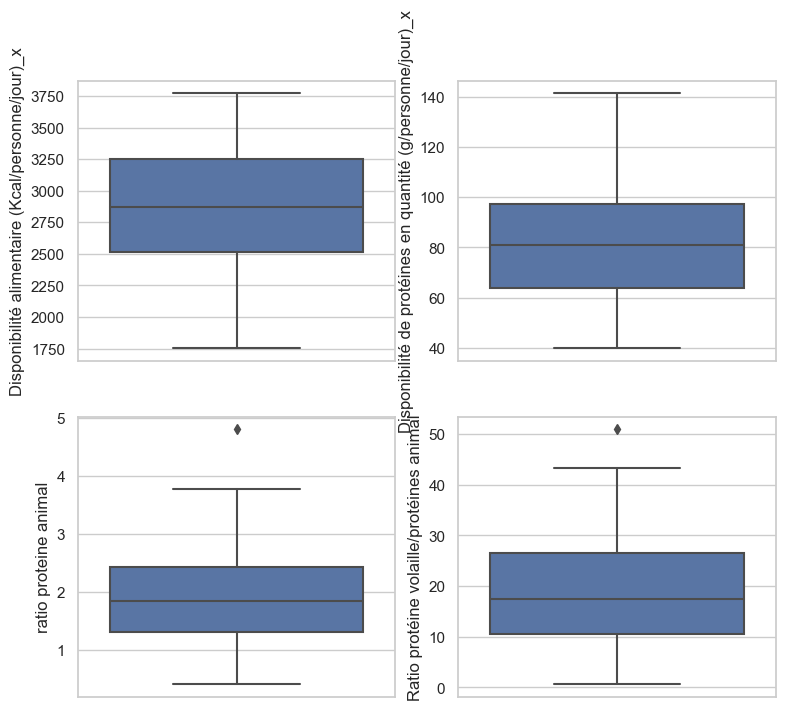

In [68]:
# Afficher des boxplot
plt.figure(figsize=(9, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=dff,y='Disponibilité alimentaire (Kcal/personne/jour)_x')
plt.subplot(222)
sns.boxplot(data=dff, y='Disponibilité de protéines en quantité (g/personne/jour)_x')
plt.subplot(223)
sns.boxplot(data=dff, y='ratio proteine animal')
plt.subplot(224)
sns.boxplot(data=dff,y='Ratio protéine volaille/protéines animal')

<AxesSubplot:ylabel='rnb_hab'>

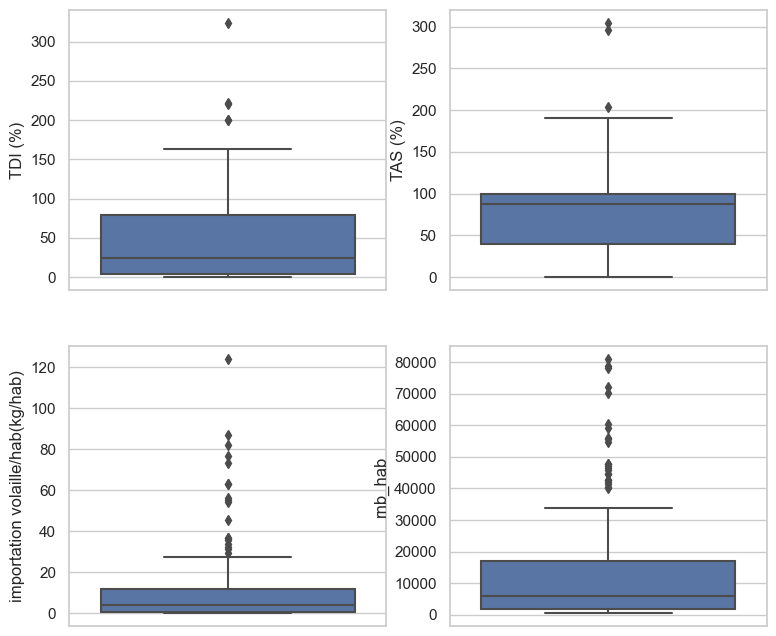

In [69]:
# Afficher des boxplot
plt.figure(figsize=(9, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=dff,y='TDI (%)')
plt.subplot(222)
sns.boxplot(data=dff, y='TAS (%)')
plt.subplot(223)
sns.boxplot(data=dff, y='importation volaille/hab(kg/hab)')
plt.subplot(224)
sns.boxplot(data=dff,y='rnb_hab')

In [70]:
dff.sort_values(by = ['TAS (%)'], ascending = False).head()

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab
Zone,,,,,,,,
Belgique,3770.0,101.35,2.08,7.90,222.37,304.61,29.597851,44567.104136
Pays-Bas,3251.0,104.43,2.64,12.39,163.44,295.70,35.719852,47903.524246
Pologne,3526.0,103.02,2.21,21.91,4.76,203.37,1.449154,13038.382428
Thaïlande,2826.0,60.94,1.72,16.62,0.23,190.24,0.028898,6148.438573
Hongrie,3289.0,87.76,2.37,19.67,21.80,185.34,5.961054,14028.279014


In [71]:
dff.sort_values(by = ['TDI (%)'], ascending = False).head()

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab
Zone,,,,,,,,
Chine - RAS de Hong-Kong,3353.0,137.88,4.80,21.82,323.93,8.57,124.139068,47724.637597
Belgique,3770.0,101.35,2.08,7.90,222.37,304.61,29.597851,44567.104136
Timor-Leste,2142.0,57.69,1.48,9.21,220.00,20.00,8.847721,1840.661924
Gambie,2542.0,63.48,1.75,7.38,200.00,25.00,7.227101,620.135020
Îles Salomon,2410.0,53.64,0.89,9.38,200.00,0.00,9.433384,2237.997123


# Observation

Nous observons des valeurs abbérantes pour le TDI et le TAS mais nous optons pour conserver les données.

In [72]:
dff.to_csv('clean_df.csv')

In [73]:
pop_2017.to_csv('pop_2017.csv')